In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import Imputer
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set(color_codes=True)
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_validate
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import f_regression, mutual_info_regression, SelectKBest
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant




In [13]:
data = pd.read_csv('~/Galvanize/analytics-capstone/data/spotify_data.csv')
drop_zeros = data[data['popularity'] > 1]

eng_X = drop_zeros[['acousticness', 'danceability',
       'duration_ms', 'energy','instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature',
       'valence']]
y = drop_zeros['popularity']

kf = KFold(10)
scorers = ['r2', 'neg_mean_squared_error']

X_train3, X_test3, y_train3, y_test3 = train_test_split(eng_X, y, test_size=0.25)

#normalize data
scalar = StandardScaler()
X_train_std3 = scalar.fit_transform(X_train3)
X_test_std3 = scalar.fit_transform(X_test3)


elastic_model3 = ElasticNet()
elastic_scores3 = cross_validate(elastic_model3, X_train_std3, y_train3, scoring=scorers, cv=kf, return_train_score=True)


print('test r2:', elastic_scores3['test_r2'].max())
print('train r2', elastic_scores3['train_r2'].mean())

test r2: 0.28225344588149304
train r2 0.2517884626668899


In [164]:
alpha_range = np.linspace(.001, 5, 1000)
l1_ratio_tests = [.25, .5, .75, 1]

In [165]:
for ratio in l1_ratio_tests: 
    best_test_score_per_alpha = []
    best_train_score_per_alpha = []
    best_train_rmse_per_alpha = []
    best_test_rmse_per_alpha = []
    for alpha in alpha_range: 
        elastic_model3 = ElasticNet(alpha=alpha,l1_ratio=ratio)
        elastic_scores3 = cross_validate(elastic_model3, X_train_std3, y_train3, scoring=scorers, cv=kf, return_train_score=True)
        best_test_score_per_alpha.append(elastic_scores3['test_r2'].max())
        best_train_score_per_alpha.append(elastic_scores3['train_r2'].max())
        best_test_rmse_per_alpha.append(np.sqrt(np.abs(elastic_scores3['test_neg_mean_squared_error'].max())))
        best_train_rmse_per_alpha.append(np.sqrt(np.abs(elastic_scores3['train_neg_mean_squared_error'].max())))
    best_test_score_per_alpha = np.array(best_test_score_per_alpha)
    best_train_score_per_alpha = np.array(best_train_score_per_alpha)
    best_test_rmse_per_alpha = np.array(best_test_rmse_per_alpha)
    best_train_rmse_per_alpha = np.array(best_train_rmse_per_alpha)
    print('-------L1 Ratio:', ratio, '---------')
    print(best_test_score_per_alpha.argmax(),best_test_score_per_alpha.max() )
    print(best_train_score_per_alpha.argmax(), best_train_score_per_alpha.max())
    print(best_test_rmse_per_alpha.argmax(), best_test_rmse_per_alpha.max())
    print(best_train_rmse_per_alpha.argmax(), best_train_rmse_per_alpha.max())

-------L1 Ratio: 0.25 ---------
0 0.3447695927937363
0 0.30333241502725794
999 23.278445050364724
999 24.904664240222502
-------L1 Ratio: 0.5 ---------
0 0.3447807343782514
0 0.3033325389900807
999 23.20797479721925
999 24.894631075705142
-------L1 Ratio: 0.75 ---------
0 0.34479186621496416
0 0.30333262220416224
999 22.944411360889006
999 24.72185269280606
-------L1 Ratio: 1 ---------
0 0.3448028603197536
0 0.30333266461242736
999 22.364533114162466
999 24.18508377596875


In [156]:
print(best_test_score_per_alpha.argmax(),best_test_score_per_alpha.max() )
print(best_train_score_per_alpha.argmax(), best_train_score_per_alpha.max())
print(best_test_rmse_per_alpha.argmax(), best_test_rmse_per_alpha.max())
print(best_train_rmse_per_alpha.argmax(), best_train_rmse_per_alpha.max())

999 0.34480898624270473
999 0.3033326812352741
0 23.20797479721925
0 24.894631075705142


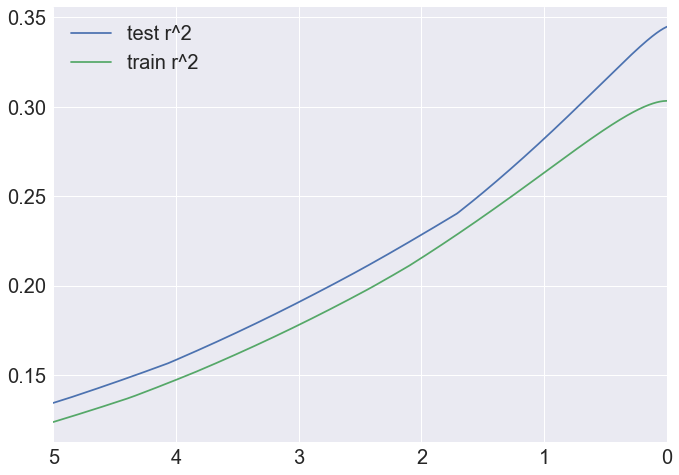

In [157]:
sns.set(font_scale=2)
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
plt.plot(alpha_range, best_test_score_per_alpha, label="test r^2")
plt.plot(alpha_range, best_train_score_per_alpha, label="train r^2")
plt.xlim(5,0)
plt.legend()
plt.show()

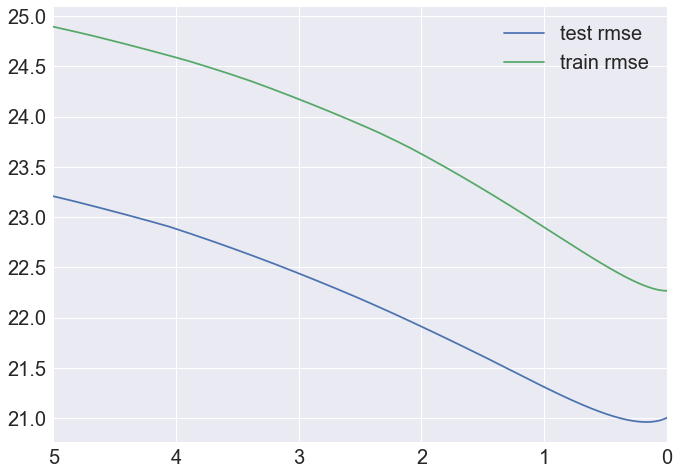

In [158]:
sns.set(font_scale=2)
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
plt.plot(alpha_range, best_test_rmse_per_alpha, label = 'test rmse')
plt.plot(alpha_range, best_train_rmse_per_alpha, label = 'train rmse')
plt.xlim(5,0)
plt.legend()
plt.show()

In [160]:
ElasticNet?